In [6]:
import dependency_installer
import xarray as xr
from data_hunter_era5 import DataRetriver
import matplotlib.pyplot as plt


%matplotlib inline
# dependency_installer.main()

In [9]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, StructureEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

longitude_value = 44.51420518337152
latitude_value = 40.18315899637762

cni_observed_Data = DataRetriver.retrive_custom_data(
    startDate='2019-11-25',
    endDate='2019-11-28',
    properties= ['10m_u_component_of_wind', '10m_v_component_of_wind','2m_temperature','surface_pressure', 'soil_temperature_level_1'],
    long_min = 43, 
    long_max = 46, 
    lat_min= 38.5,
    lat_max= 41)

# Assuming 'global_observed_data[0]' is your dataset
# Extract the data for causal network inference



data_for_causal_network = xr.merge(cni_observed_Data).sel(longitude=longitude_value, latitude=latitude_value, method='nearest').to_dataframe()

# Drop the 'time' column as it is not needed for causal inference
# data_for_causal_network = data_for_causal_network.drop(columns=['time'])

# Define the structure of the Bayesian Network
# You need to specify the causal relationships based on your domain knowledge
# Here, I'm assuming a simple structure for demonstration purposes
edges = [('u10', 't2m'), ('v10', 't2m'), ('sp', 't2m')]
model = BayesianNetwork(edges)


# Estimate the parameters of the model
model.fit(data_for_causal_network)
inference = VariableElimination(model)

In [13]:
predicted_t2m = inference.map_query(variables=['t2m'], evidence={'u10': 1, 'v10': 1, 'sp': 1})
print('Predicted t2m:', predicted_t2m)

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

Predicted t2m: {'t2m': 266.76334}


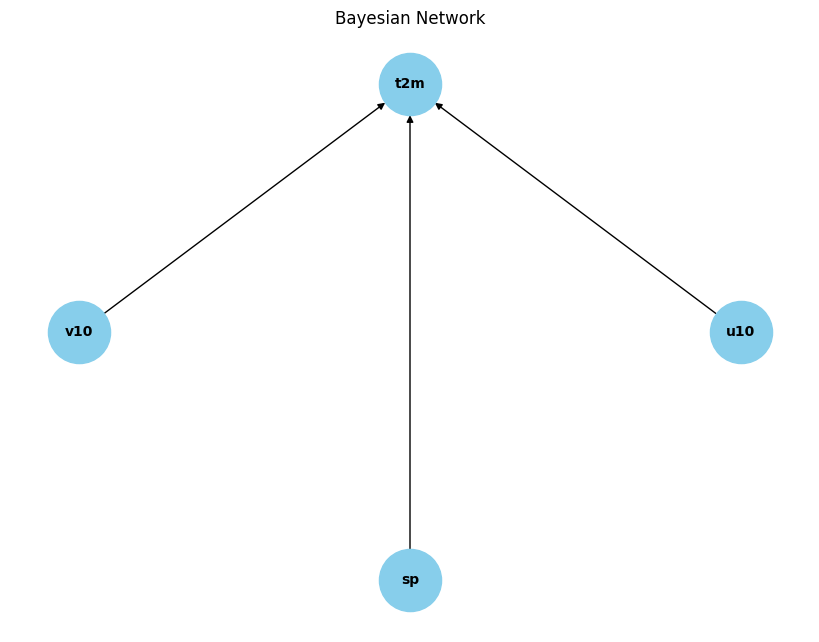

In [10]:
import networkx as nx

# Visualize the model (optional)

pos = nx.circular_layout(model)
plt.figure(figsize=(8, 6))
nx.draw(model, pos=pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.title("Bayesian Network")
plt.show()